# Segmenting Customer Data

In this example, we are looking to help our banking client improve their marketing campaigns by identifying the optimal number of customer segments for their credit card clients.  Using a dataset that consists of customer data that includes ten different features. The data columns were anonymized using generic names to protect customers' privacy, and data values were already normalized.

Use the starter code to accomplish the following tasks:

1. Load the raw data into a Pandas DataFrame.

2. Use the Elbow Method to determine the optimal number of clusters.

3. Segment the data with K-means using the optimal number of clusters.

In [1]:
# Import the modules
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.cluster import KMeans

## Part 1: Load the raw data into a Pandas DataFrame

In [2]:
# Set the file path
customer_path = Path('../Resources/customers.csv')

# Read the csv file into a pandas DataFrame
df = pd.read_csv(customer_path)

# Review the DataFrame
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,1.148534,4.606077,2.699069,-2.661824,1.526433,1.236671,0.211421,1.482896,-4.445627,-1.936831
1,-1.149410,-1.650549,2.530167,-3.227088,0.572138,4.162600,-0.291679,-1.237575,3.604765,-1.635689
2,0.332427,-0.887985,-0.309216,0.399891,0.828492,3.641945,-0.916946,-1.978024,1.056772,-1.882747
3,2.245599,3.826309,0.264039,0.095471,1.984380,0.373991,-0.280279,1.602786,-5.993331,-2.258925
4,0.705503,-1.312329,0.895406,-0.405408,1.116187,3.699562,-1.427985,-1.494409,1.156908,-1.434964


In [3]:
# Use the "info()" Pandas function to validate data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   1000 non-null   float64
 1   feature_2   1000 non-null   float64
 2   feature_3   1000 non-null   float64
 3   feature_4   1000 non-null   float64
 4   feature_5   1000 non-null   float64
 5   feature_6   1000 non-null   float64
 6   feature_7   1000 non-null   float64
 7   feature_8   1000 non-null   float64
 8   feature_9   1000 non-null   float64
 9   feature_10  1000 non-null   float64
dtypes: float64(10)
memory usage: 78.2 KB


In [4]:
# Use the Pandas "describe()" function to compute summary statistics
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.022428,0.805748,1.942896,-2.364030,0.854980,1.232422,0.146269,0.833486,-0.534320,-1.219393
std,2.382021,2.335796,1.411307,1.716566,1.742986,3.250231,1.635576,2.039563,4.211831,1.979172
min,-6.259471,-4.649286,-2.894995,-8.735778,-4.641509,-9.111470,-4.260013,-4.911903,-9.522425,-6.083462
25%,-2.091657,-1.214774,1.026128,-3.438149,-0.235310,-0.333722,-0.967569,-0.894817,-4.129561,-2.505366
50%,0.161670,1.096439,1.905107,-2.437602,1.084556,1.367371,-0.222299,1.519069,-0.536849,-1.706372
75%,2.030005,2.513648,2.851613,-1.229730,2.287268,3.637304,1.061269,2.298862,2.626514,-0.553571
max,6.275723,7.955158,5.897102,4.296552,4.741350,8.705423,7.123969,5.789222,10.047819,5.413623


## Part 2: Use the Elbow Method to determine the optimal number of clusters

In [5]:
# Import the KMeans module from SKLearn
from sklearn.cluster import KMeans

In [6]:
# Create a list to store inertia values and the values of k
inertia = []

# Create a list to set the range of k values to test
k = list(range(1,11))

In [7]:
# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the "customers_df" DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

In [8]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {'k':k,'inertia':inertia}
elbow_df = pd.DataFrame(elbow_data)

# Review the DataFrame
elbow_df.head()

,k,inertia
0,1,58103.759171
1,2,32183.537923
2,3,17080.936423
3,4,14894.368711
4,5,12816.540877


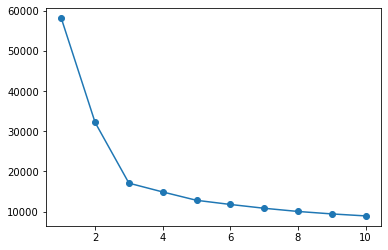

In [9]:
# Plot the DataFrame to identify the optimal value for k
plt.plot(k,inertia,marker='o')
plt.show()

## Part 3: Segment the data with K-means using the optimal number of clusters

In [10]:
# Define the model with optimal number of clusters
model = KMeans(n_clusters=3, random_state=1)

# Fit the model
model.fit(df)

# Make predictions
predictions_1 = model.predict(df)

# Add a class column with the labels
df['clusters_3'] = predictions_1

df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,clusters_3
0,1.148534,4.606077,2.699069,-2.661824,1.526433,1.236671,0.211421,1.482896,-4.445627,-1.936831,1
1,-1.149410,-1.650549,2.530167,-3.227088,0.572138,4.162600,-0.291679,-1.237575,3.604765,-1.635689,0
2,0.332427,-0.887985,-0.309216,0.399891,0.828492,3.641945,-0.916946,-1.978024,1.056772,-1.882747,0
3,2.245599,3.826309,0.264039,0.095471,1.984380,0.373991,-0.280279,1.602786,-5.993331,-2.258925,1
4,0.705503,-1.312329,0.895406,-0.405408,1.116187,3.699562,-1.427985,-1.494409,1.156908,-1.434964,0


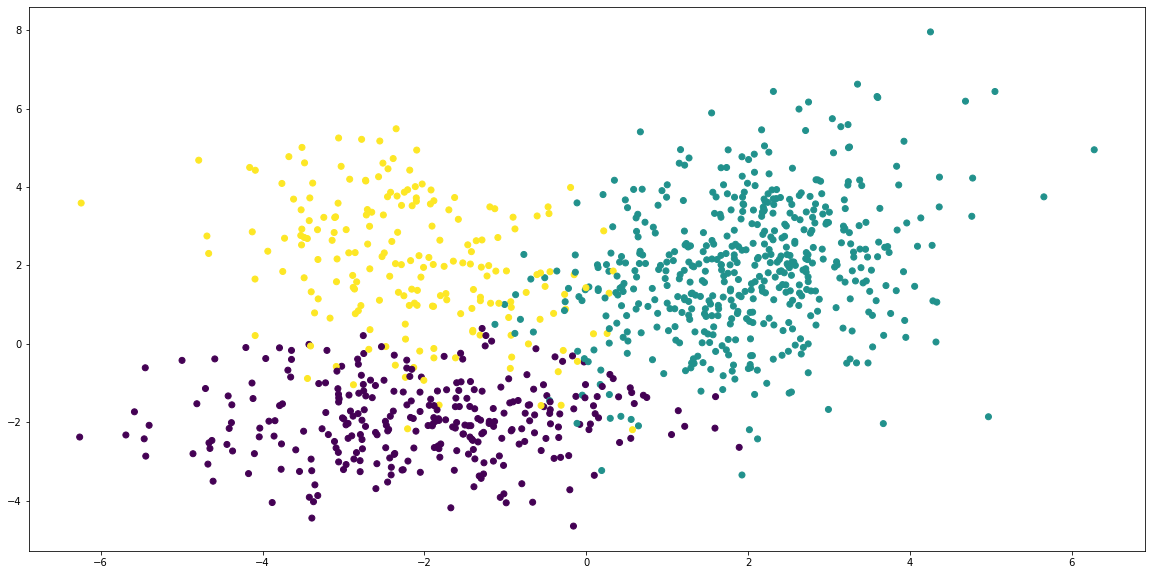

In [11]:
# Plot the clusters using the "feature_1" and "feature_2" columns
x = df['feature_1']
y = df['feature_2']

plt.figure(figsize=(20,10))
plt.scatter(x,y,c=predictions_1)
plt.show()

#### Optional Challenge: Use hvPlot to display the clusters using the `feature_1` column against the other nine columns.

**Hint:** To display all the plot combinations, you can use the [`subplots` parameter](https://hvplot.holoviz.org/user_guide/Subplots.html) of hvPlot.

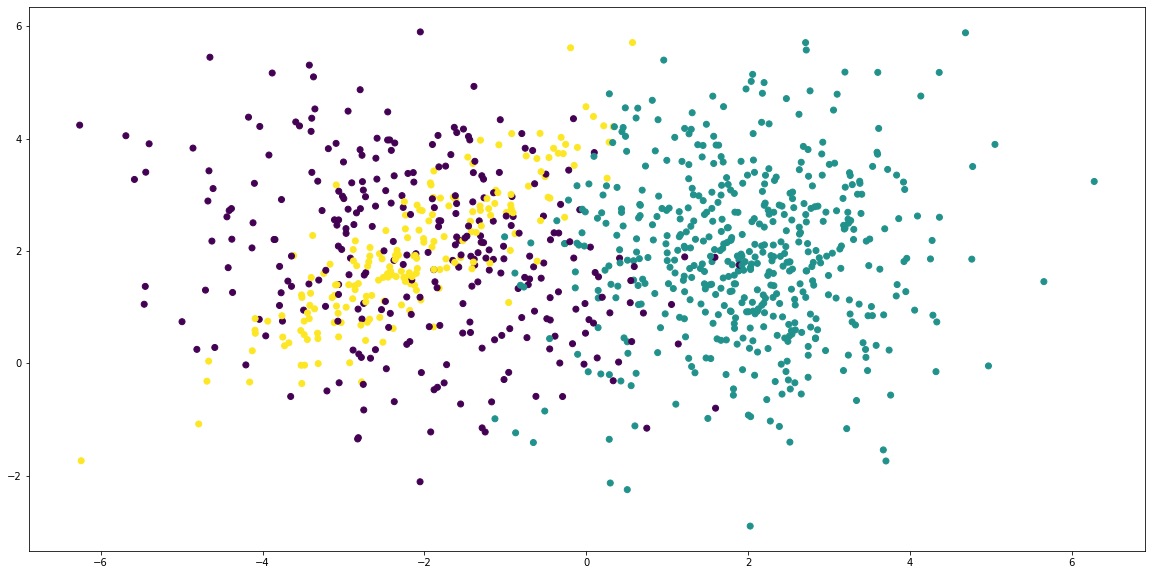

In [18]:
# Plot the clusters using the "feature_1" columns againsts the othe nine columns
x = df['feature_1']
y = df['feature_3']

plt.figure(figsize=(20,10))
plt.scatter(x,y,c=predictions_1)
plt.show()

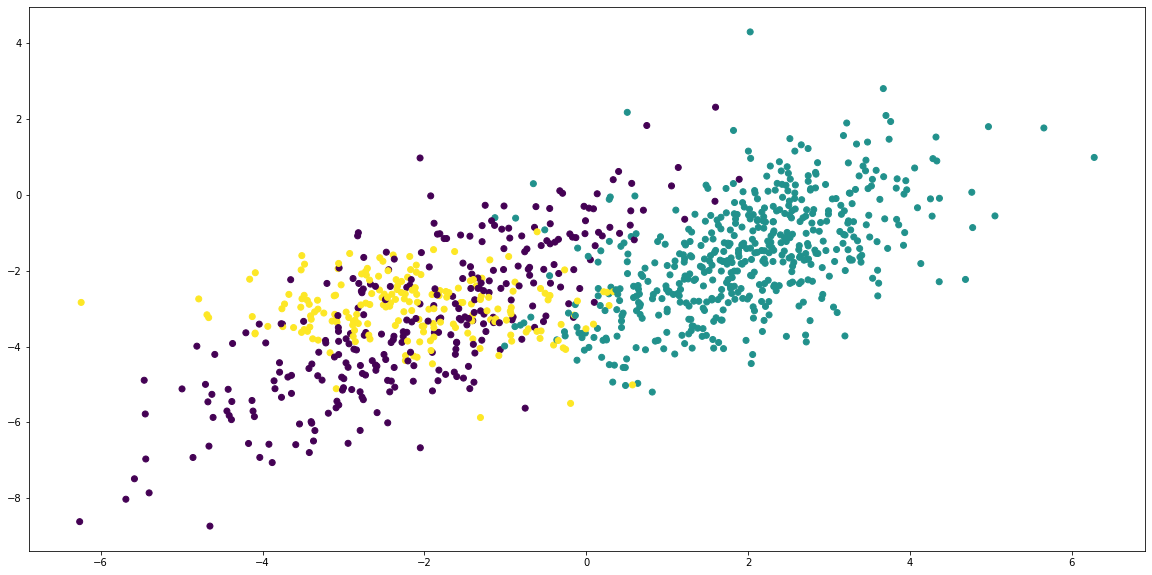

In [17]:
x = df['feature_1']
y = df['feature_4']

plt.figure(figsize=(20,10))
plt.scatter(x,y,c=predictions_1)
plt.show()

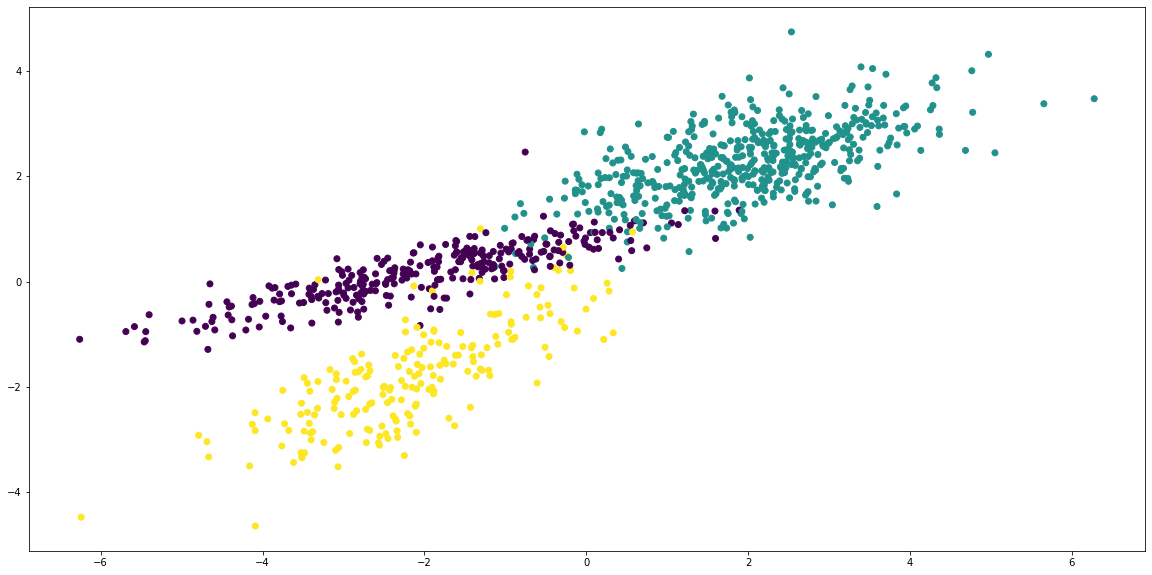

In [16]:
x = df['feature_1']
y = df['feature_5']

plt.figure(figsize=(20,10))
plt.scatter(x,y,c=predictions_1)
plt.show()

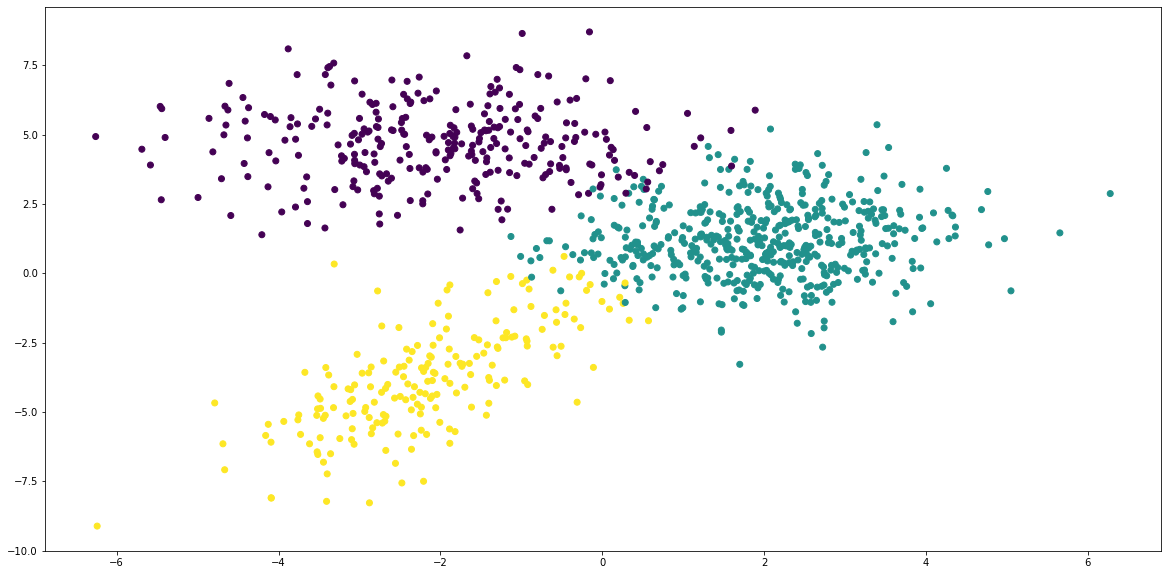

In [15]:
x = df['feature_1']
y = df['feature_6']

plt.figure(figsize=(20,10))
plt.scatter(x,y,c=predictions_1)
plt.show()

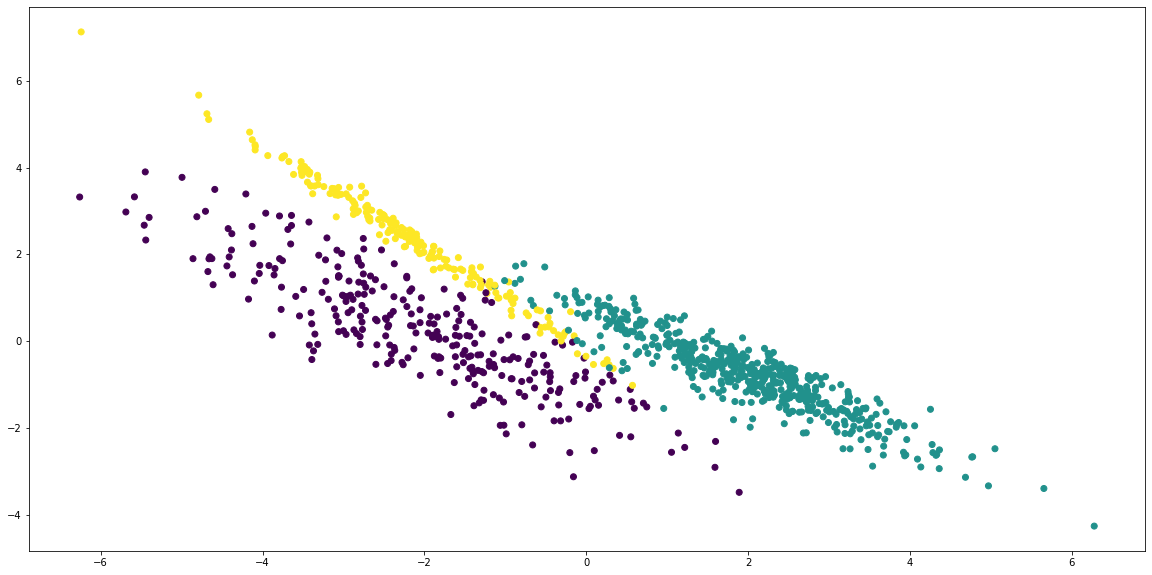

In [14]:
x = df['feature_1']
y = df['feature_7']

plt.figure(figsize=(20,10))
plt.scatter(x,y,c=predictions_1)
plt.show()

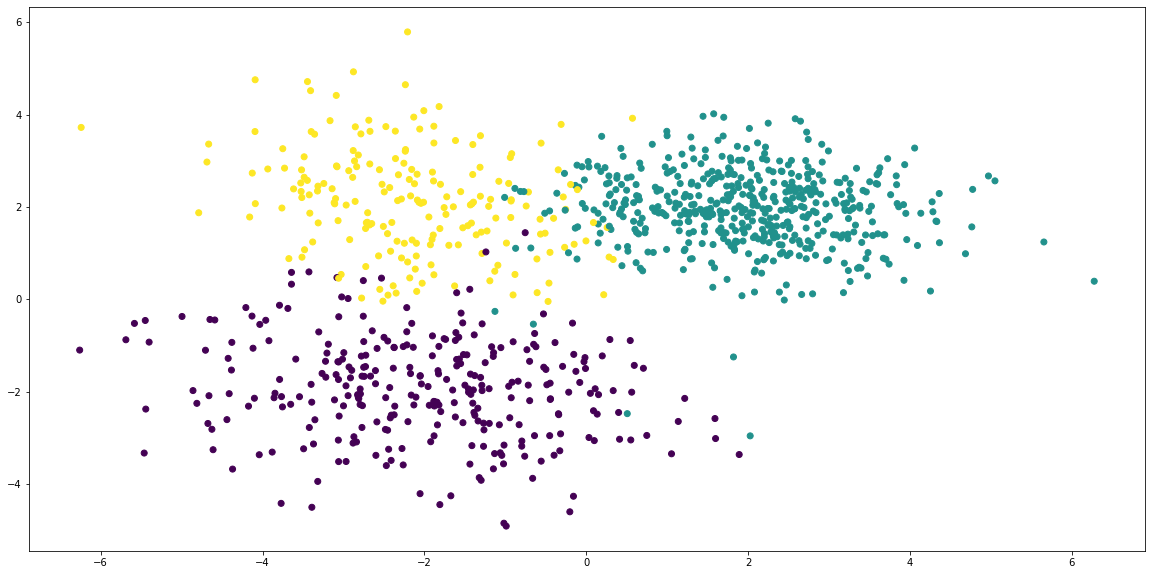

In [13]:
x = df['feature_1']
y = df['feature_8']

plt.figure(figsize=(20,10))
plt.scatter(x,y,c=predictions_1)
plt.show()

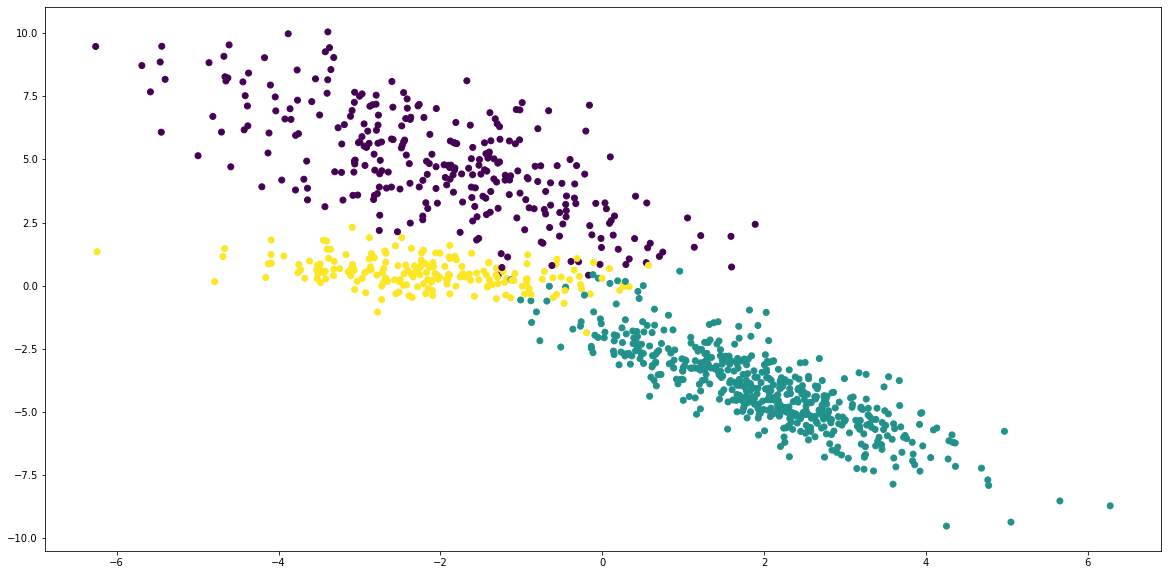

In [12]:
x = df['feature_1']
y = df['feature_9']

plt.figure(figsize=(20,10))
plt.scatter(x,y,c=predictions_1)
plt.show()